<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [14]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



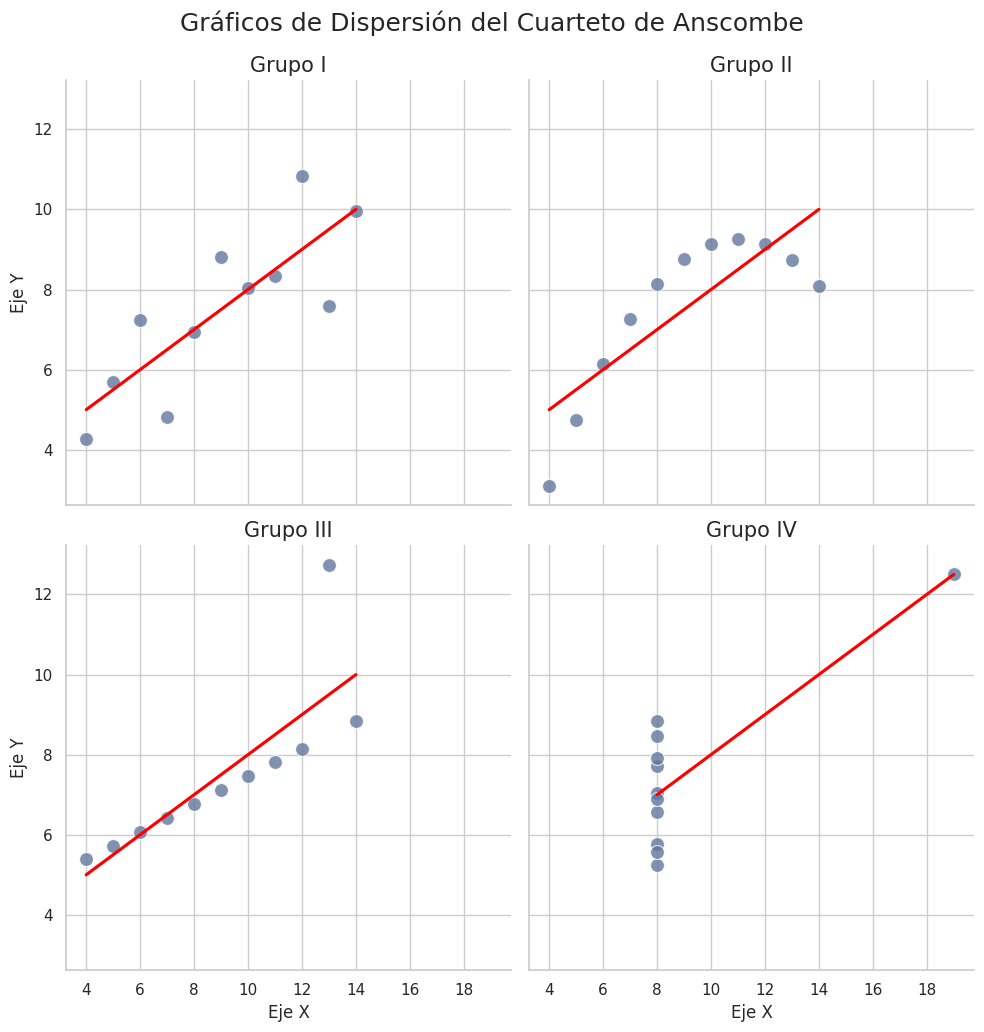

In [15]:
g = sns.FacetGrid(data, col="dataset", col_wrap=2, height=5)

g.map(sns.scatterplot, "x", "y", s=100, alpha=0.8)
g.map(sns.regplot, "x", "y", ci=None, scatter=False, color="red")

g.set_titles("Grupo {col_name}", size=15)
g.set_axis_labels("Eje X", "Eje Y", size=12)
g.fig.suptitle("Gráficos de Dispersión del Cuarteto de Anscombe", y=1.03, size=18)

plt.show()

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [16]:
estadisticas = data.groupby('dataset').describe()
print(estadisticas)

correlacion = data.groupby('dataset')[['x', 'y']].corr().unstack().iloc[:, 1]
print("\\nCorrelación (Pearson) por grupo:")
print(correlacion)

            x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50  
\nCorrelación (Pearson) por grupo:
dataset
I      0.816421
II     0.816237
III    0.816287
IV     0.816521
Nam

Aunque los cuatro conjuntos presentan idénticos valores de media, desviación estándar y correlación lineal, las distribuciones subyacentes son distintas.

El Grupo I se ajusta razonablemente a una relación lineal, sin valores atípicos notorios.

El Grupo II, pese a tener las mismas estadísticas, muestra un patrón curvo que no se refleja en los indicadores numéricos.

El Grupo III mantiene la tendencia lineal, pero un outlier en 𝑥=13, 𝑦=12.74 distorsiona el ajuste.

El Grupo IV concentra casi todos los puntos en un mismo valor de x=8, y un solo punto extremo genera artificialmente la misma correlación que en los otros grupos.

Esto evidencia que las estadísticas descriptivas no son suficientes para comprender la naturaleza de los datos, reforzando la necesidad de complementar con visualización gráfica.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



--- Resultados para el Grupo I ---
  Error Cuadrático Medio (MSE): 1.25
  Coeficiente de Determinación (R²): 0.67
  Modelo: y = 0.50x + 3.00

--- Resultados para el Grupo II ---
  Error Cuadrático Medio (MSE): 1.25
  Coeficiente de Determinación (R²): 0.67
  Modelo: y = 0.50x + 3.00

--- Resultados para el Grupo III ---
  Error Cuadrático Medio (MSE): 1.25
  Coeficiente de Determinación (R²): 0.67
  Modelo: y = 0.50x + 3.00

--- Resultados para el Grupo IV ---
  Error Cuadrático Medio (MSE): 1.25
  Coeficiente de Determinación (R²): 0.67
  Modelo: y = 0.50x + 3.00



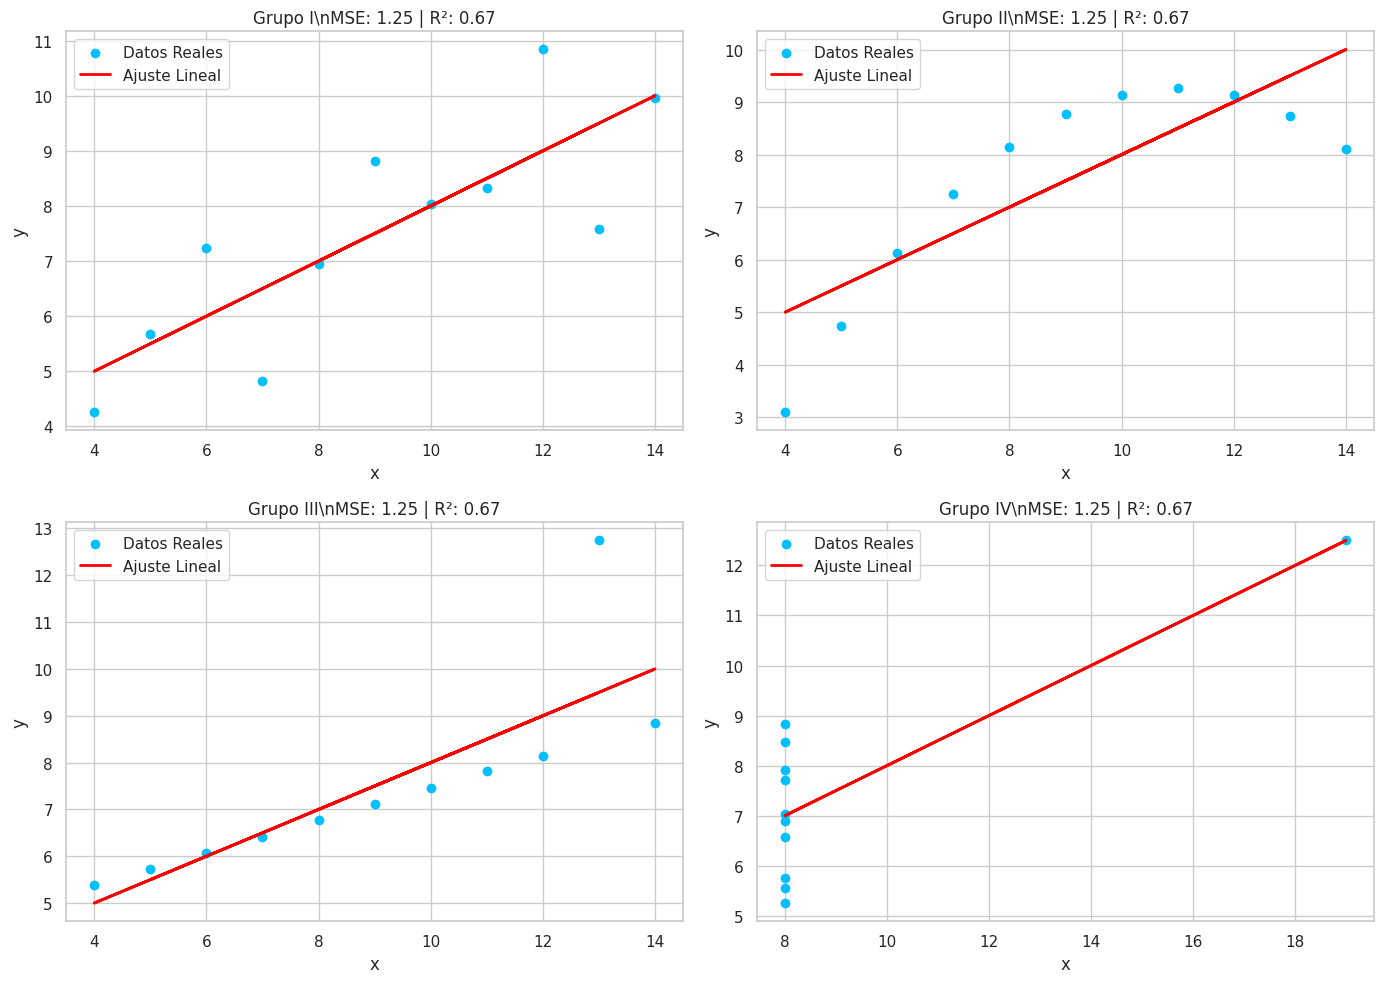

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, dataset_name in enumerate(data['dataset'].unique()):
    df_group = data[data['dataset'] == dataset_name]
    X = df_group[['x']]
    y = df_group['y']

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"--- Resultados para el Grupo {dataset_name} ---")
    print(f"  Error Cuadrático Medio (MSE): {mse:.2f}")
    print(f"  Coeficiente de Determinación (R²): {r2:.2f}")
    print(f"  Modelo: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n")

    axes[i].scatter(X, y, label='Datos Reales', color='deepskyblue')
    axes[i].plot(X, y_pred, color='red', linewidth=2, label='Ajuste Lineal')
    axes[i].set_title(f'Grupo {dataset_name}\\nMSE: {mse:.2f} | R²: {r2:.2f}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].legend()

plt.tight_layout()
plt.show()

El ajuste lineal entrega para los cuatro grupos el mismo MSE (≈1.25) y el mismo R² (≈0.67), además de una ecuación idéntica (y=0.50x+3.00).
Sin embargo, al observar los gráficos:

En el Grupo I, la recta captura bien la relación lineal.

En el Grupo II, la tendencia es no lineal, por lo que el modelo subestima y sobreestima en distintos tramos.

En el Grupo III, el ajuste parece correcto, pero está fuertemente afectado por un único outlier, lo que hace que las métricas no reflejen la calidad real del modelo.

En el Grupo IV, la correlación se debe a un solo punto extremo, por lo que la regresión no es representativa.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

--- Resultados Mejorados para el Grupo II ---
  Nuevo MSE (Polinómico): 0.00 (Original: 1.25)
  Nuevo R² (Polinómico): 1.00 (Original: 0.67)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


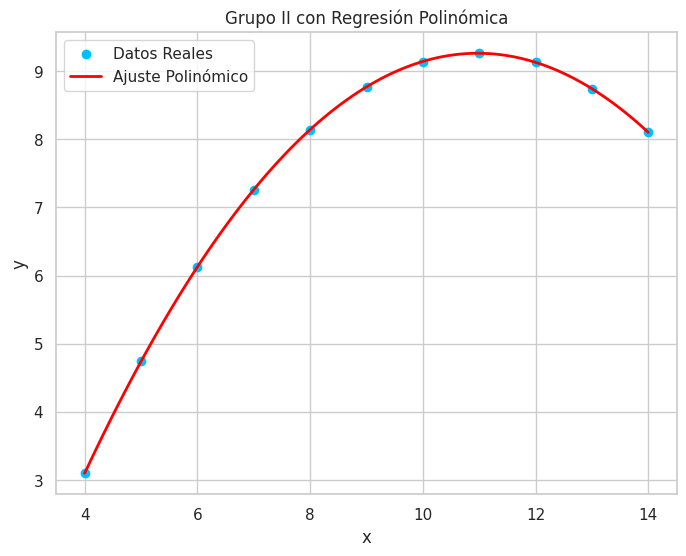


--- Resultados Mejorados para el Grupo III ---
  Nuevo MSE (sin outlier): 0.00 (Original: 6.00)
  Nuevo R² (sin outlier): 1.00 (Original: 0.40)


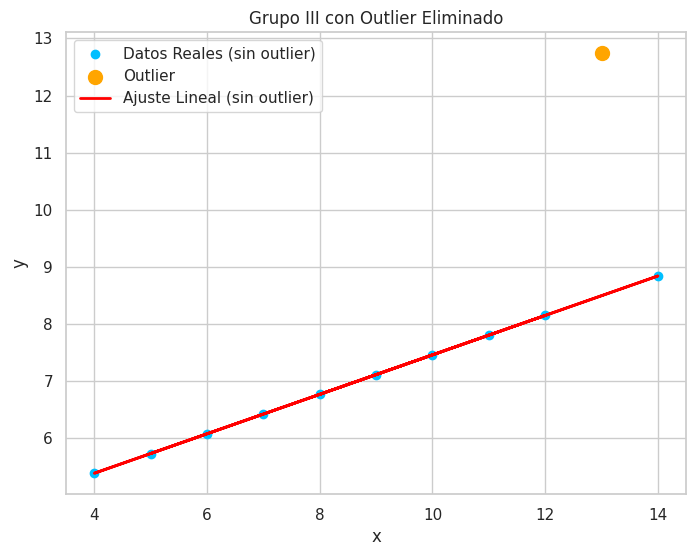


--- Análisis para el Grupo IV ---
Datos originales:
   dataset     x      y
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89

Datos después de eliminar el punto influyente:
   dataset    x     y
33      IV  8.0  6.58
34      IV  8.0  5.76
35      IV  8.0  7.71
36      IV  8.0  8.84
37      IV  8.0  8.47
38      IV  8.0  7.04
39      IV  8.0  5.25
41      IV  8.0  5.56
42      IV  8.0  7.91
43      IV  8.0  6.89

No se puede ajustar un modelo de regresión lineal porque solo hay un valor único para 'x' (no hay pendiente).


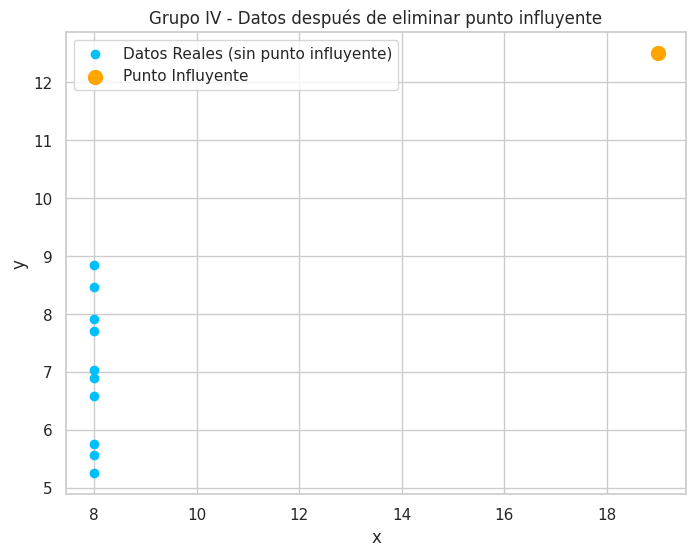

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

print("--- Resultados Mejorados para el Grupo II ---")
df_g2 = data[data['dataset'] == 'II']
X_g2 = df_g2[['x']]
y_g2 = df_g2['y']

model_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_poly.fit(X_g2, y_g2)
y_pred_poly = model_poly.predict(X_g2)

mse_poly = mean_squared_error(y_g2, y_pred_poly)
r2_poly = r2_score(y_g2, y_pred_poly)

print(f"  Nuevo MSE (Polinómico): {mse_poly:.2f} (Original: {mean_squared_error(y_g2, LinearRegression().fit(X_g2, y_g2).predict(X_g2)):.2f})")
print(f"  Nuevo R² (Polinómico): {r2_poly:.2f} (Original: {r2_score(y_g2, LinearRegression().fit(X_g2, y_g2).predict(X_g2)):.2f})")

plt.figure(figsize=(8, 6))
plt.scatter(X_g2, y_g2, label='Datos Reales', color='deepskyblue')

x_range = np.linspace(X_g2.min(), X_g2.max(), 100).reshape(-1, 1)
y_pred_range = model_poly.predict(x_range)
plt.plot(x_range, y_pred_range, color='red', linewidth=2, label='Ajuste Polinómico')
plt.title('Grupo II con Regresión Polinómica')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


print("\n--- Resultados Mejorados para el Grupo III ---")
df_g3 = data[data['dataset'] == 'III']

outlier = df_g3[df_g3['y'] > 10]
df_g3_clean = df_g3.drop(outlier.index)

X_g3_clean = df_g3_clean[['x']]
y_g3_clean = df_g3_clean['y']

model_clean = LinearRegression()
model_clean.fit(X_g3_clean, y_g3_clean)
y_pred_clean = model_clean.predict(X_g3_clean)

mse_clean = mean_squared_error(y_g3_clean, y_pred_clean)
r2_clean = r2_score(y_g3_clean, y_pred_clean)

print(f"  Nuevo MSE (sin outlier): {mse_clean:.2f} (Original: {mean_squared_error(df_g3[['x']], df_g3['y']):.2f})")
print(f"  Nuevo R² (sin outlier): {r2_clean:.2f} (Original: {r2_score(df_g3[['x']], df_g3['y']):.2f})")


plt.figure(figsize=(8, 6))
plt.scatter(X_g3_clean, y_g3_clean, label='Datos Reales (sin outlier)', color='deepskyblue')
plt.scatter(outlier[['x']], outlier[['y']], color='orange', label='Outlier', s=100)
plt.plot(X_g3_clean, y_pred_clean, color='red', linewidth=2, label='Ajuste Lineal (sin outlier)')
plt.title('Grupo III con Outlier Eliminado')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print("\n--- Análisis para el Grupo IV ---")
df_g4 = data[data['dataset'] == 'IV']
print("Datos originales:")
print(df_g4)

influential_point = df_g4[df_g4['x'] > 10]
df_g4_clean = df_g4.drop(influential_point.index)

print("\nDatos después de eliminar el punto influyente:")
print(df_g4_clean)

if len(df_g4_clean['x'].unique()) > 1:
    X_g4_clean = df_g4_clean[['x']]
    y_g4_clean = df_g4_clean['y']
    model_g4_clean = LinearRegression()
    model_g4_clean.fit(X_g4_clean, y_g4_clean)
    y_pred_g4_clean = model_g4_clean.predict(X_g4_clean)

    mse_g4_clean = mean_squared_error(y_g4_clean, y_pred_g4_clean)
    r2_g4_clean = r2_score(y_g4_clean, y_g4_clean)

    print(f"\n  Nuevo MSE (sin punto influyente): {mse_g4_clean:.2f} (Original: {mean_squared_error(df_g4[['x']], df_g4['y']):.2f})")
    print(f"  Nuevo R² (sin punto influyente): {r2_g4_clean:.2f} (Original: {r2_score(df_g4[['x']], df_g4['y']):.2f})")

    plt.figure(figsize=(8, 6))
    plt.scatter(X_g4_clean, y_g4_clean, label='Datos Reales (sin punto influyente)', color='deepskyblue')
    plt.scatter(influential_point[['x']], influential_point[['y']], color='orange', label='Punto Influyente', s=100)
    plt.plot(X_g4_clean, y_pred_g4_clean, color='red', linewidth=2, label='Ajuste Lineal (sin punto influyente)')
    plt.title('Grupo IV con Punto Influyente Eliminado')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

else:
    print("\nNo se puede ajustar un modelo de regresión lineal porque solo hay un valor único para 'x' (no hay pendiente).")
    plt.figure(figsize=(8, 6))
    plt.scatter(df_g4_clean[['x']], df_g4_clean[['y']], label='Datos Reales (sin punto influyente)', color='deepskyblue')
    plt.scatter(influential_point[['x']], influential_point[['y']], color='orange', label='Punto Influyente', s=100)
    plt.title('Grupo IV - Datos después de eliminar punto influyente')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()